<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-2-Applied-Modeling/blob/master/U2S3M4_Andrew_Rust_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

https://heartbeat.fritz.ai/introduction-to-self-organizing-maps-soms-98e88b568f5d

https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost

https://rapids.ai/

https://umap-learn.readthedocs.io/en/latest/

In [0]:
import pandas as pd

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = "https://raw.githubusercontent.com/DrewRust/Kepler_Planet_data/master/AllPlanets.csv"
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
allPlanets_df = pd.read_csv(DATA_PATH)  

In [0]:
def wrangle(dataframe):
    
    # Prevent SettingWithCopyWarning
    dataframe = dataframe.copy()

    dataframe = dataframe[['soltype', # target
                           'pl_name', # planet name
                           'hostname', # star name
                           'pl_letter', # b is the most common for b being next to a the star
                           'sy_snum', # number of stars in the planetary system
                           'sy_pnum', # number of planets in the planetary system
                           'discoverymethod', # transit is the most common categorical (11)
                           'disc_locale', # location of observation of planet discovery (ground or space (23,000 maj))
                           'pl_orbper', # Time the planet takes to make a complete orbit around the host star or system
                           'pl_rade', # planet radius in earth radii
                           'pl_radj', # planet radius in jupiter radii
                           'pl_eqt', # planet equilibrium temperature
                           'pl_insol', # insolotion flux
                           'pl_tranmid', # Time of Conjuction (Transit Midpoint) [days]
                           'pl_imppar', # sky projected distance between the center of the stellar disc and planet disc
                           'pl_trandep', # flux caused by transit of planet eclipsing star
                           'pl_trandurd', # transit duration 
                           'pl_ratdor', # ratio of the distance between the planet and the star at mid-transit divided by the stellar radius.
                           'pl_ratror', # ratio of planet to stellar radius
                           'st_teff', # stellar temperature
                           'st_rad', # stellar radius
                           'st_mass', # stellar mass
                           'st_met', # metallicity compared to hydrogen content
                           'st_metratio', # categorical metal content
                           'st_logg', # gravitational acceleration experienced at star surface
                           'ra', # east and west
                           'dec', # north and south
                           'sy_pm', # total proper motion change
                           'sy_dist', # Distance to the planetary system in units of parsecs
                           'sy_plx', # Difference in the angular position two opposite positions within the Earth's orbit
                           'sy_vmag']] # Brightness of the host star as measured using the Kepler bandpass

    dataframe['IS_Confirmed_Planet'] = dataframe.soltype.apply(lambda x: True if x == "CONFIRMED" else False)
    dataframe = dataframe.drop(columns='soltype')

    return dataframe 

In [0]:
allPlanets = wrangle(allPlanets_df)

In [0]:
numeric_col = allPlanets.describe()
categoric_col = allPlanets.describe(exclude='number')

In [0]:
numbers = numeric_col.columns.to_list()
categoricals = categoric_col.columns.to_list()

In [31]:
print(len(numbers))
numbers

24


['sy_snum',
 'sy_pnum',
 'pl_orbper',
 'pl_rade',
 'pl_radj',
 'pl_eqt',
 'pl_insol',
 'pl_tranmid',
 'pl_imppar',
 'pl_trandep',
 'pl_trandurd',
 'pl_ratdor',
 'pl_ratror',
 'st_teff',
 'st_rad',
 'st_mass',
 'st_met',
 'st_logg',
 'ra',
 'dec',
 'sy_pm',
 'sy_dist',
 'sy_plx',
 'sy_vmag']

In [32]:
categoricals.remove('pl_name')
categoricals.remove('hostname')
print(len(categoricals))
categoricals

5


['pl_letter',
 'discoverymethod',
 'disc_locale',
 'st_metratio',
 'IS_Confirmed_Planet']

In [0]:
allPlanets.insert(0, 'New_ID', range(0, len(allPlanets)))

In [103]:
allPlanets.head()

,New_ID,pl_name,hostname,pl_letter,sy_snum,sy_pnum,discoverymethod,disc_locale,pl_orbper,pl_rade,pl_radj,pl_eqt,pl_insol,pl_tranmid,pl_imppar,pl_trandep,pl_trandurd,pl_ratdor,pl_ratror,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,ra,dec,sy_pm,sy_dist,sy_plx,sy_vmag,IS_Confirmed_Planet
0,0,11 Com b,11 Com,b,2,1,Radial Velocity,Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,NaN,NaN,NaN,185.178779,17.793252,140.383627,93.1846,10.71040,4.72307,True
1,1,11 Com b,11 Com,b,2,1,Radial Velocity,Ground,326.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,185.178779,17.793252,140.383627,93.1846,10.71040,4.72307,True
2,2,11 UMi b,11 UMi,b,1,1,Radial Velocity,Ground,516.21997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,229.274595,71.823943,10.679019,125.3210,7.95388,5.01300,True
3,3,11 UMi b,11 UMi,b,1,1,Radial Velocity,Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,NaN,NaN,NaN,229.274595,71.823943,10.679019,125.3210,7.95388,5.01300,True
4,4,11 UMi b,11 UMi,b,1,1,Radial Velocity,Ground,516.22000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4340.0,24.08,1.80,0.04,[Fe/H],1.60,229.274595,71.823943,10.679019,125.3210,7.95388,5.01300,True


In [104]:
allPlanets.tail()

,New_ID,pl_name,hostname,pl_letter,sy_snum,sy_pnum,discoverymethod,disc_locale,pl_orbper,pl_rade,pl_radj,pl_eqt,pl_insol,pl_tranmid,pl_imppar,pl_trandep,pl_trandurd,pl_ratdor,pl_ratror,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,ra,dec,sy_pm,sy_dist,sy_plx,sy_vmag,IS_Confirmed_Planet
26331,26331,ups And d,ups And,d,2,3,Radial Velocity,Ground,1278.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6105.51,1.64,1.15,0.101,[M/H],4.07,24.198353,41.403815,419.857418,13.4054,74.5711,4.09565,True
26332,26332,ups And d,ups And,d,2,3,Radial Velocity,Ground,1274.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.198353,41.403815,419.857418,13.4054,74.5711,4.09565,True
26333,26333,ups And d,ups And,d,2,3,Radial Velocity,Ground,1319.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.198353,41.403815,419.857418,13.4054,74.5711,4.09565,True
26334,26334,xi Aql b,xi Aql,b,1,1,Radial Velocity,Ground,136.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4780.00,12.00,2.20,-0.205,[Fe/H],2.66,298.562449,8.461105,129.341395,56.1858,17.7725,4.70964,True
26335,26335,xi Aql b,xi Aql,b,1,1,Radial Velocity,Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.40,NaN,NaN,NaN,298.562449,8.461105,129.341395,56.1858,17.7725,4.70964,True


In [0]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(allPlanets, random_state=42, shuffle="True")

In [0]:
train, test = train_test_split(train, random_state=42)

In [108]:
train.shape, val.shape, test.shape

((14814, 32), (6584, 32), (4938, 32))

In [43]:
target = 'IS_Confirmed_Planet'
# features = numbers + categoricals
# features = categoricals
# features = ['pl_orbper', 'pl_ratror', 'sy_plx', 'st_logg', 'pl_trandurd', 'pl_rade']
# features = ['pl_orbper', 'pl_rade', 'st_logg', 'st_metratio', 'sy_plx', 'discoverymethod']
features = ['pl_orbper', 'pl_rade', 'pl_tranmid', 'st_logg']

# features.remove(target);
print(target)
print(features)
print(len(features))

IS_Confirmed_Planet
['pl_orbper', 'pl_rade', 'pl_tranmid', 'st_logg']
4


In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37#:~:text=A%20data%20is%20called%20as,as%20on%20the%20right%20side.

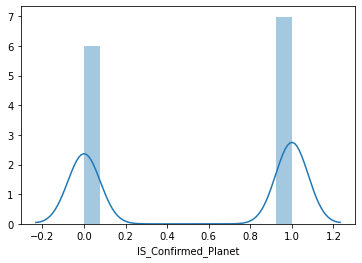

In [45]:
# Left skew or negatively skewed
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

### This gave me an error "no objects to concatenate"
#### ..from too many NaN's so imputed them.  Even scaled but at very bottom of assignment just imputed and works better.

## First create Gradient Boosting Model

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline

In [123]:
from xgboost import XGBClassifier

gb = make_pipeline(
    SimpleImputer(),
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

gb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='binary:l

In [124]:
from sklearn.metrics import accuracy_score

y_pred = gb.predict(X_val)
print(f'Validation accuracy: {accuracy_score(y_val, y_pred)}')

Validation accuracy: 0.8529769137302552


### Now do the isolate
### Doesn't work here because of the nans 

In [0]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from pdpbox.pdp import pdp_isolate, pdp_plot

In [126]:
feature = 'pl_tranmid'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

ValueError: ignored

In [0]:
pdp_plot(isolated, feature_name=feature);

### Try something new (This works but the data is scaled so it obscures the real corresponding values).

https://www.kaggle.com/dansbecker/partial-plots

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas.util.testing as tm

Have to impute the NaN's

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)


Have to add the column names back in.

In [0]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_encoded.columns)

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_train_scaled, y_train)

In [0]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

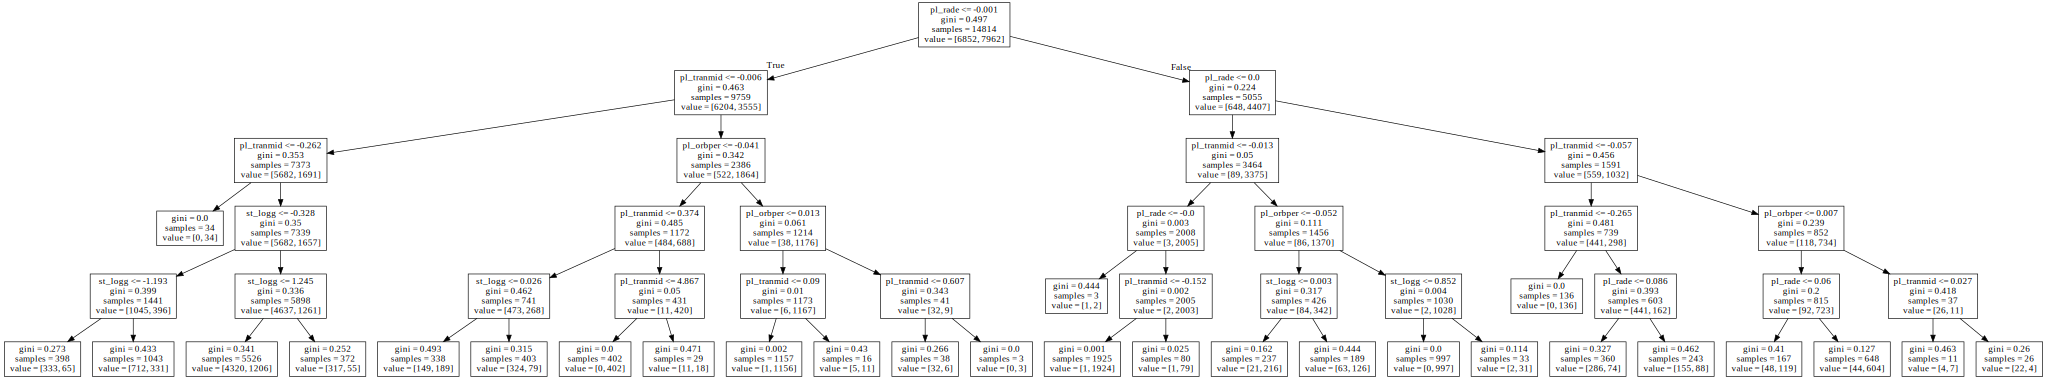

In [63]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=features)
graphviz.Source(tree_graph)

Just trying to shrink down the above visualization.

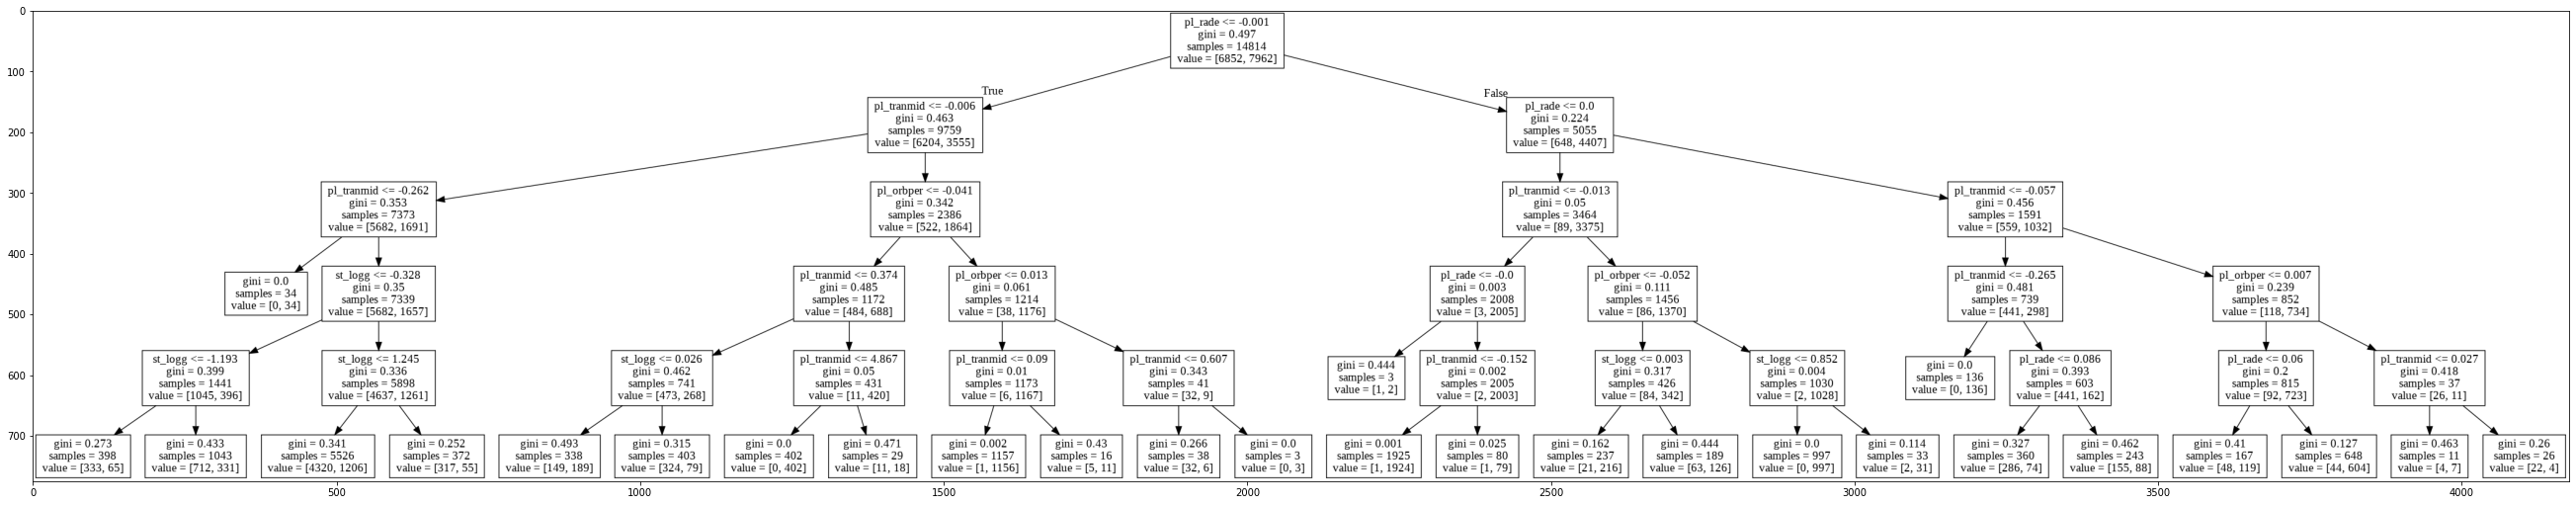

In [62]:
from sklearn import tree
import graphviz

dot_data = io.StringIO()
tree_graph = tree.export_graphviz(tree_model, out_file=dot_data, feature_names=features)
graphviz.Source(tree_graph)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(46,46))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show();

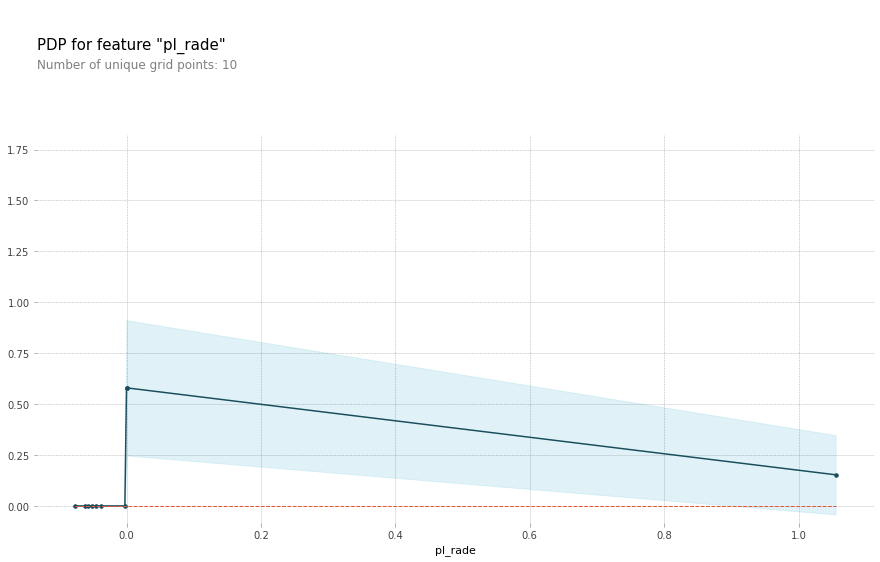

In [67]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_rade = pdp.pdp_isolate(model=tree_model, dataset=X_val_scaled, model_features=features, feature='pl_rade')

# plot it
pdp.pdp_plot(pdp_rade, 'pl_rade')
plt.show();

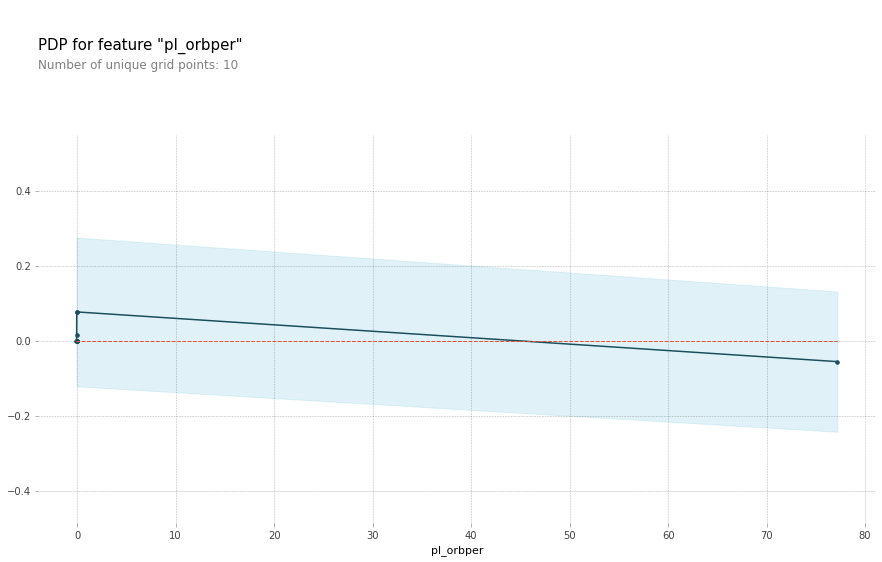

In [66]:
feature_to_plot = 'pl_orbper'
pdp_orb = pdp.pdp_isolate(model=tree_model, dataset=X_val_scaled, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_orb, feature_to_plot)
plt.show();

Stellar Surface Gravity.  More likely to be a confirmed planet with a stellar surface gravity of about -1 (keep in mind it's been scaled)

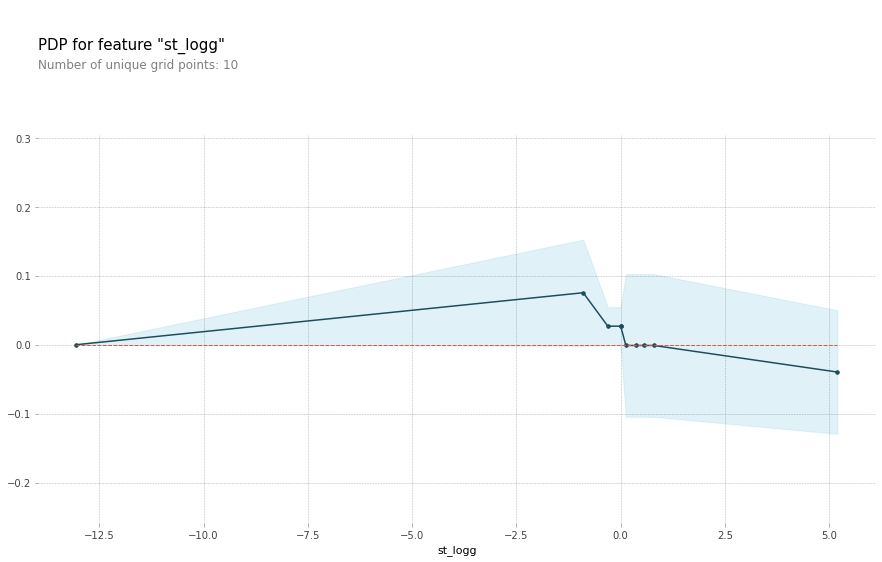

In [68]:
feature_to_plot = 'st_logg'
pdp_stlogg = pdp.pdp_isolate(model=tree_model, dataset=X_val_scaled, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_stlogg, feature_to_plot)
plt.show();

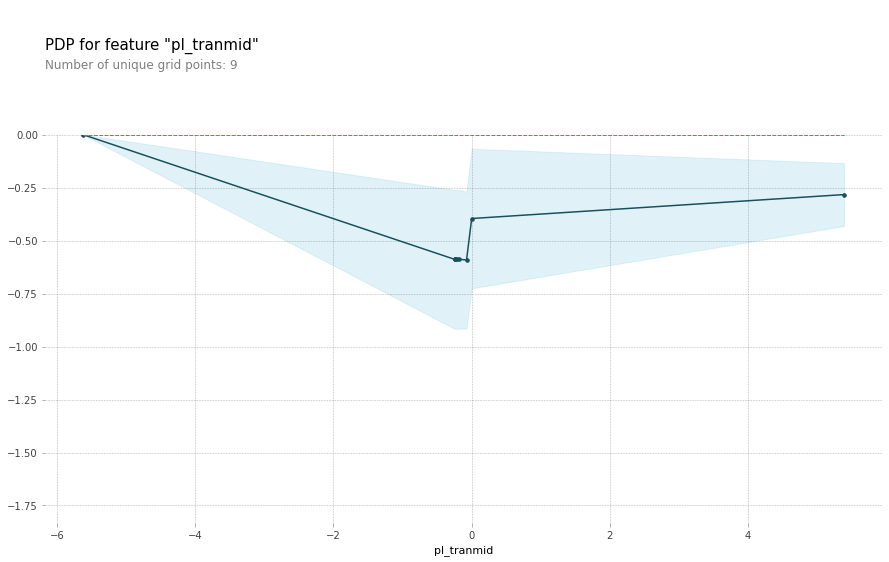

In [69]:
feature_to_plot = 'pl_tranmid'
pdp_tranmid = pdp.pdp_isolate(model=tree_model, dataset=X_val_scaled, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_tranmid, feature_to_plot)
plt.show();

## Could try again using the tutorial link below (also above) - continue later first do shapely.

https://github.com/SauceCat/PDPbox/blob/master/tutorials/pdpbox_binary_classification.ipynb

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

from pdpbox import pdp, get_dataset, info_plots

### Shapely Graph try.

#### This works and is in the notes U2S3M4 under bonus Classification example to predict good and bad loans.  I'm predicting whether it's a planet or not.

In [79]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.813645	validation_1-auc:0.816161
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.853538	validation_1-auc:0.852161
[2]	validation_0-auc:0.849915	validation_1-auc:0.847509
[3]	validation_0-auc:0.854098	validation_1-auc:0.85289
[4]	validation_0-auc:0.851258	validation_1-auc:0.84862
[5]	validation_0-auc:0.865728	validation_1-auc:0.863827
[6]	validation_0-auc:0.867053	validation_1-auc:0.864175
[7]	validation_0-auc:0.867715	validation_1-auc:0.867802
[8]	validation_0-auc:0.869302	validation_1-auc:0.868299
[9]	validation_0-auc:0.870682	validation_1-auc:0.86885
[10]	validation_0-auc:0.870654	validation_1-auc:0.868694
[11]	validation_0-auc:0.870722	validation_1-auc:0.869003
[12]	validation_0-auc:0.871093	validation_1-auc:0.86926
[13]	validation_0-auc:0.870333	validation_1-auc:0.868171
[14]	validation_0-auc:0.87071	validation_1-auc:0.86839
[15]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.8737887443401581


In [0]:
# Save the ids for later, so we can look up actual results,
# to compare with predicted results
train_id = train['New_ID']
val_id = val['New_ID']
test_id = test['New_ID']

In [0]:
df = pd.DataFrame({
    'New_ID': test_id, 
    'pred_proba': y_pred_proba, 
    'planet_group': y_test
})

df = df.merge(
     allPlanets[['New_ID','pl_orbper', 'pl_rade', 'pl_tranmid', 'st_logg']], 
     how='left'
)

In [111]:
df.head()

,New_ID,pred_proba,planet_group,pl_orbper,pl_rade,pl_tranmid,st_logg
0,13892,0.198856,True,11.187140,1.70,2.454970e+06,4.52
1,20370,0.233325,False,40.606982,2.16,2.455032e+06,4.56
2,22399,0.192733,False,10.128048,2.24,2.454972e+06,4.41
3,2022,0.925499,True,21.998000,NaN,NaN,4.60
4,7091,0.205299,False,5.191040,2.07,2.454968e+06,4.41


In [0]:
confirmed = df['planet_group'] == True
notConfirmed = ~confirmed
right = (confirmed) == (df['pred_proba'] > 0.50)
wrong = ~right

In [115]:
df[confirmed & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

,New_ID,pred_proba,planet_group,pl_orbper,pl_rade,pl_tranmid,st_logg
1819,7222,0.876186,True,4.164385,NaN,2.455004e+06,4.70
3598,10912,0.879732,True,10.139620,NaN,2.455011e+06,4.60
4843,5702,0.941817,True,NaN,2.821,NaN,NaN
3808,8134,0.950928,True,4.521581,NaN,2.454966e+06,4.17
3345,9236,0.960054,True,14.454218,NaN,2.454968e+06,3.94
3757,25,0.981322,True,452.800000,NaN,NaN,3.50
4167,3031,0.992670,True,2.174782,1.630,2.457394e+06,4.63
3982,26100,0.994129,True,3.713020,13.047,2.455737e+06,4.31
319,2304,0.994639,True,27000.000000,NaN,NaN,4.02
1578,2288,0.995190,True,2131.800000,NaN,NaN,3.15


In [120]:
row = test.loc[test['New_ID'] == 7222]
row = row[['pl_orbper', 'pl_rade', 'pl_tranmid', 'st_logg']]
row

,pl_orbper,pl_rade,pl_tranmid,st_logg
7222,4.164385,NaN,2.455004e+06,4.7


In [121]:
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

### Re-doing the above failed isolated graph correctly

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)

In [0]:
X_train_imputed_wcol = pd.DataFrame(X_train_imputed, columns=X_train_encoded.columns)
X_val_imputed_wcol = pd.DataFrame(X_val_imputed, columns=X_val_encoded.columns)

In [133]:
X_train_imputed_wcol.head()

,pl_orbper,pl_rade,pl_tranmid,st_logg
0,14.796746,0.970,2.454976e+06,4.30
1,125.602302,3.190,2.455048e+06,4.45
2,4.465630,14.908,2.455128e+06,4.30
3,15.906864,2.600,2.455011e+06,4.56
4,21.587528,2.180,2.454976e+06,4.28


In [0]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_train_imputed_wcol, y_train)

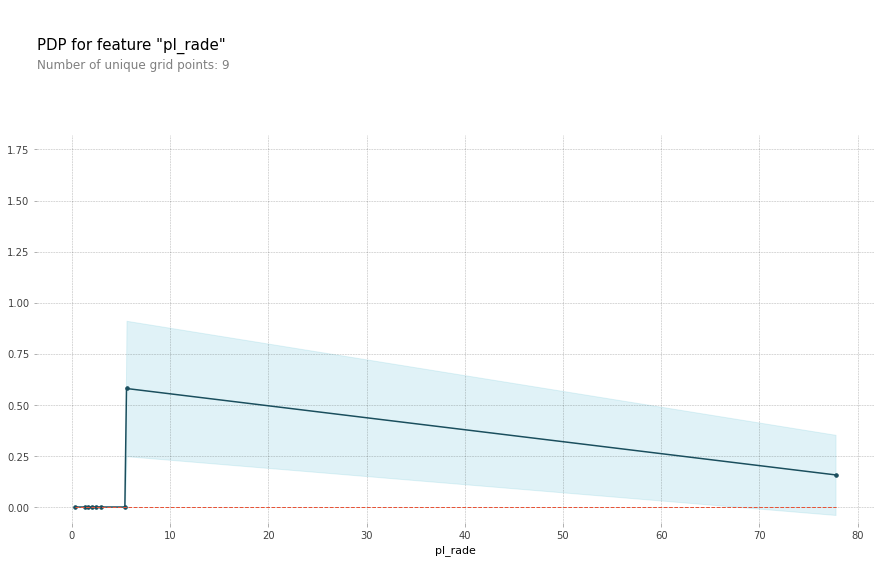

In [135]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_rade = pdp.pdp_isolate(model=tree_model, dataset=X_val_imputed_wcol, model_features=features, feature='pl_rade')

# plot it
pdp.pdp_plot(pdp_rade, 'pl_rade')
plt.show();

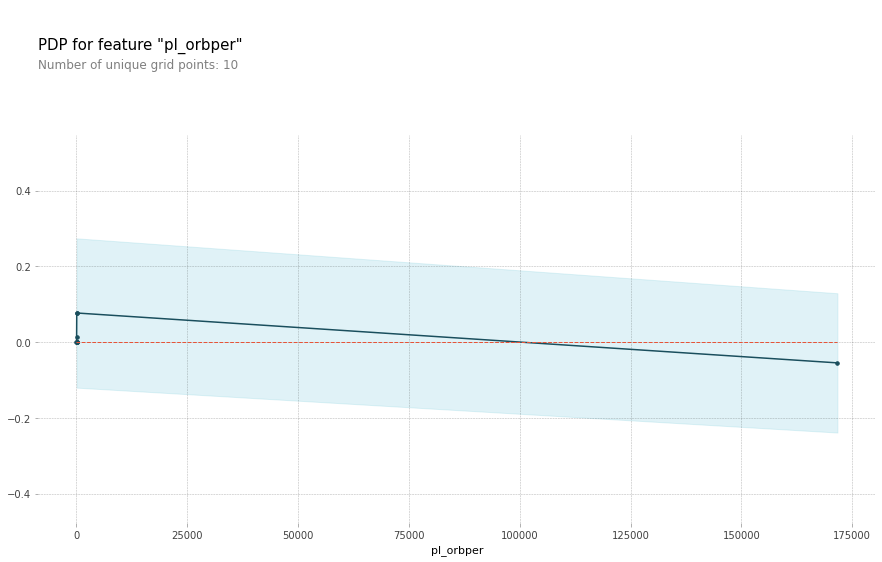

In [136]:
pdp_obr_2 = pdp.pdp_isolate(model=tree_model, dataset=X_val_imputed_wcol, model_features=features, feature='pl_orbper')

# plot it
pdp.pdp_plot(pdp_obr_2, 'pl_orbper')
plt.show();

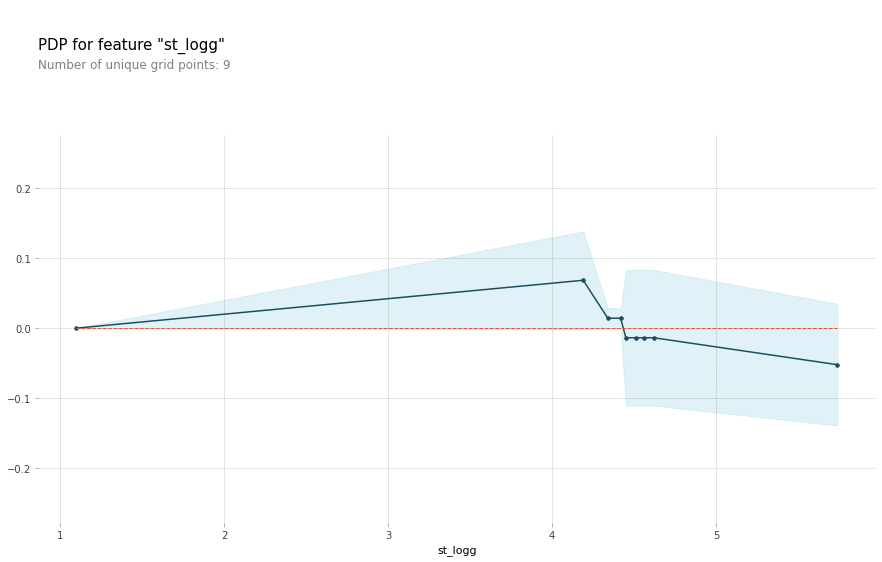

In [137]:
feature_to_plot = 'st_logg'
pdp_stlogg_2 = pdp.pdp_isolate(model=tree_model, dataset=X_val_imputed_wcol, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_stlogg_2, feature_to_plot)
plt.show();

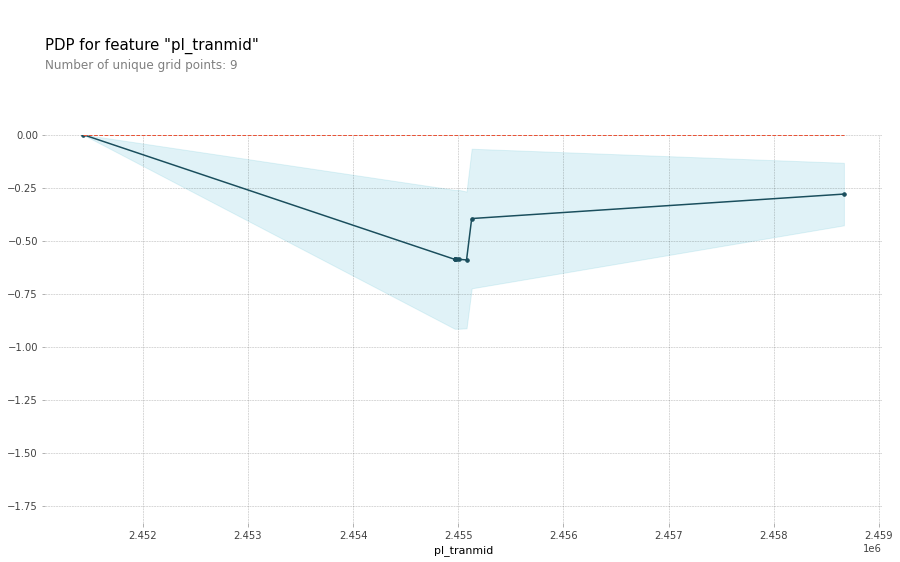

In [138]:
feature_to_plot = 'pl_tranmid'
pdp_tranmid_2 = pdp.pdp_isolate(model=tree_model, dataset=X_val_imputed_wcol, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_tranmid_2, feature_to_plot)
plt.show();